In [70]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

In [46]:
df = pd.read_csv('/home/smebellis/ece5831_final_project/processed_data/post_processing_clustered.csv')

In [47]:
df['PERIOD'] = df['WEEKDAY'] + '-' + df['TIME_PERIODS']

In [57]:
# Step 2: Convert Traffic Status to Numeric Values
status_mapping = {'Light': 1, 'Medium': 2, 'Heavy': 3}
df['Traffic_Status_Numeric'] = df['TRAFFIC_STATUS'].map(status_mapping)

In [58]:
# Step 3: Aggregate the Data to Handle Duplicates
# Here we take the average if there are multiple entries for the same Period and District
df_agg = df.groupby(['PERIOD', 'DISTRIC_CLUSTER'])['Traffic_Status_Numeric'].mean().reset_index()

In [61]:
ordered_periods = ['Monday-Morning', 'Monday-Afternoon', 'Monday-Night', 'Tuesday-Morning', 'Tuesday-Afternoon', 'Tuesday-Night', 'Wednesday-Morning', 'Wednesday-Afternoon', 'Wednesday-Night', 'Thursday-Morning', 'Thursday-Afternoon', 'Thursday-Night', 'Friday-Morning', 'Friday-Afternoon', 'Friday-Night', 'Saturday-Morning', 'Saturday-Afternoon', 'Saturday-Night', 'Sunday-Morning', 'Sunday-Afternoon', 'Sunday-Night']

In [64]:
# Step 4: Pivot the DataFrame to have districts as columns and periods as rows
heatmap_data = df_agg.pivot(index='PERIOD', columns='DISTRIC_CLUSTER', values='Traffic_Status_Numeric')

In [65]:
# Reindex the pivot table to have the periods in the desired order
heatmap_data = heatmap_data.reindex(ordered_periods)

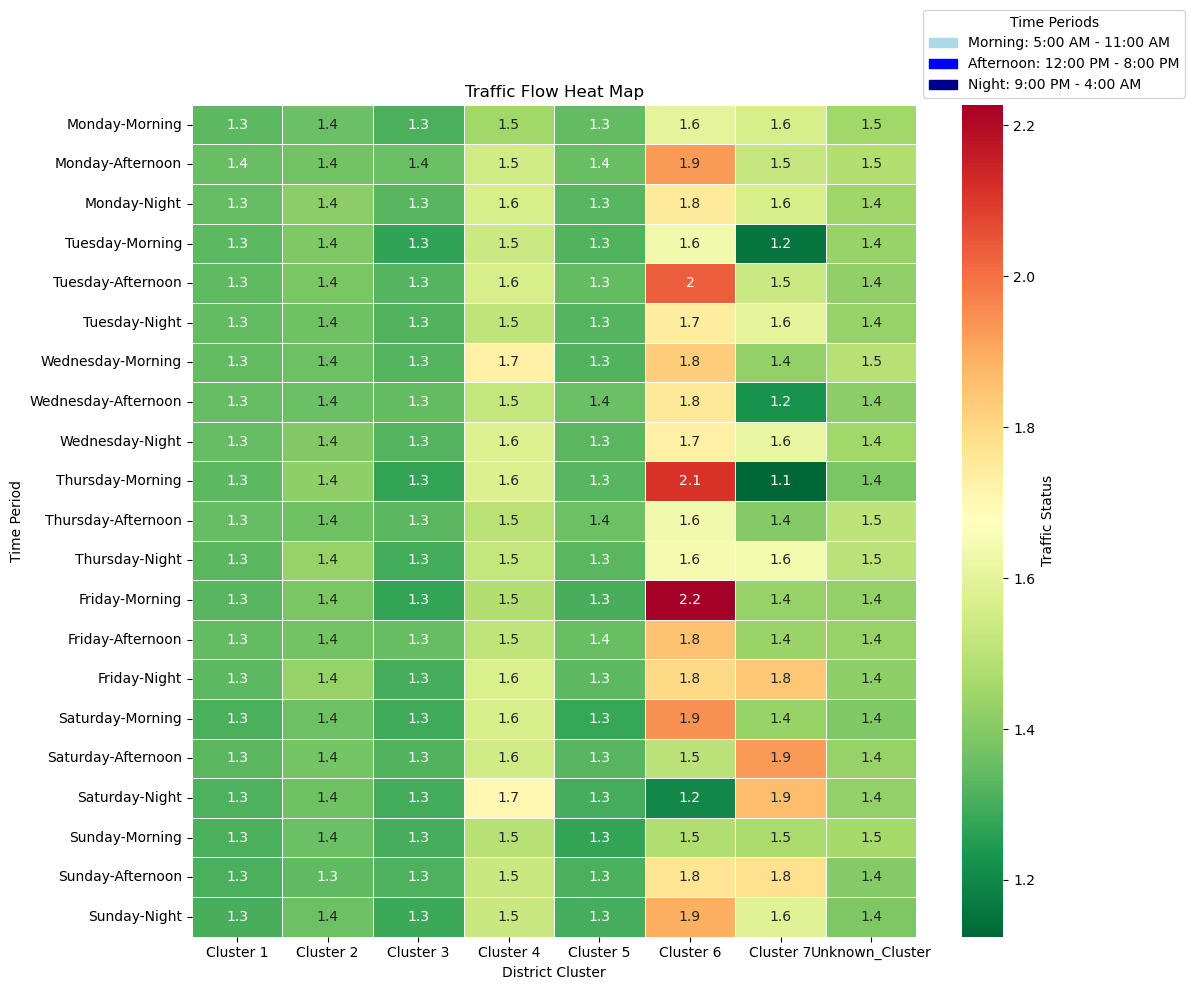

In [76]:
# Step 5: Plot the Heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(heatmap_data, annot=True, cmap='RdYlGn_r', linewidths=0.5, cbar_kws={'label': 'Traffic Status'}, yticklabels=True)

# Step 7: Add a Key/Legend for Time Periods
# Create custom legend handles to represent morning, afternoon, and night

# Needs to adjust the time frame to match what was clustered 
morning_patch = mpatches.Patch(color='lightblue', label='Morning: 5:00 AM - 11:00 AM')
afternoon_patch = mpatches.Patch(color='blue', label='Afternoon: 12:00 PM - 8:00 PM')
night_patch = mpatches.Patch(color='darkblue', label='Night: 9:00 PM - 4:00 AM')

# Add the legend to the plot
plt.legend(handles=[morning_patch, afternoon_patch, night_patch], title='Time Periods', loc='lower left', bbox_to_anchor=(1, 1))
# Customize the plot
plt.title('Traffic Flow Heat Map')
plt.ylabel('Time Period')
plt.xlabel('District Cluster')

# Show the plot
plt.tight_layout()
plt.show()